In [4]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [5]:
# upload kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
# !kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 98% 420M/428M [00:05<00:00, 53.2MB/s]
100% 428M/428M [00:05<00:00, 86.6MB/s]


In [8]:
import zipfile

zip_ref = zipfile.ZipFile("/content/toronto-emotional-speech-set-tess.zip", "r")
zip_ref.extractall("/content/inputs")
zip_ref.close()


---
### Preprocessing...
---

In [9]:
import os

tess_path = "/content/inputs/tess toronto emotional speech set data/TESS Toronto emotional speech set data"
tess_files = os.listdir(tess_path)
tess_files

['OAF_Sad',
 'YAF_angry',
 'OAF_neutral',
 'OAF_happy',
 'YAF_pleasant_surprised',
 'OAF_Fear',
 'YAF_disgust',
 'OAF_angry',
 'YAF_sad',
 'OAF_Pleasant_surprise',
 'OAF_disgust',
 'YAF_happy',
 'YAF_fear',
 'YAF_neutral']

In [10]:
file_paths = []
file_emotions = []

for dir in tess_files:
    files = os.listdir(os.path.join(tess_path + "/", dir))

    for f in files:
      file_emotions.append(f.split("_")[-1].split(".")[0].replace("ps", "surprise"))
      file_paths.append(tess_path + "/" + dir + "/" + f)


In [11]:
df = pd.DataFrame({"paths": file_paths, "emotions": file_emotions})

df.head()

,paths,emotions
0,/content/inputs/tess toronto emotional speech ...,sad
1,/content/inputs/tess toronto emotional speech ...,sad
2,/content/inputs/tess toronto emotional speech ...,sad
3,/content/inputs/tess toronto emotional speech ...,sad
4,/content/inputs/tess toronto emotional speech ...,sad


In [12]:
unique_emo = list(set(df["emotions"]))
unique_emo

['surprise', 'sad', 'happy', 'angry', 'neutral', 'fear', 'disgust']

In [13]:
label_encode_dict = dict(zip(unique_emo, range(0, 8)))
label_encode_dict

{'surprise': 0,
 'sad': 1,
 'happy': 2,
 'angry': 3,
 'neutral': 4,
 'fear': 5,
 'disgust': 6}

---
### EDA
---

<Axes: xlabel='emotions', ylabel='count'>

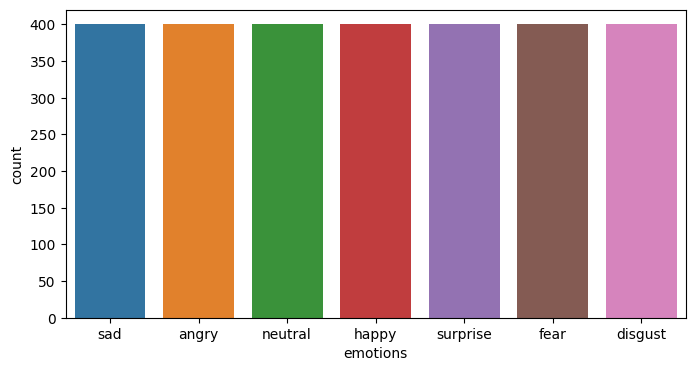

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="emotions")

In [15]:
import librosa
import IPython.display as ipd

In [16]:
data, sr = librosa.load(df["paths"][2002])
print(df["emotions"][2002], end="\n\n")
ipd.Audio(data, rate=sr)

disgust



In [17]:
sr, data.shape

(22050, (48628,))

In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()


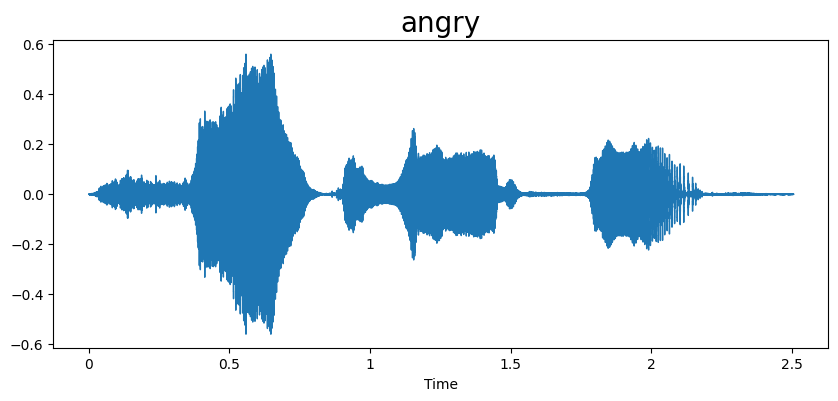

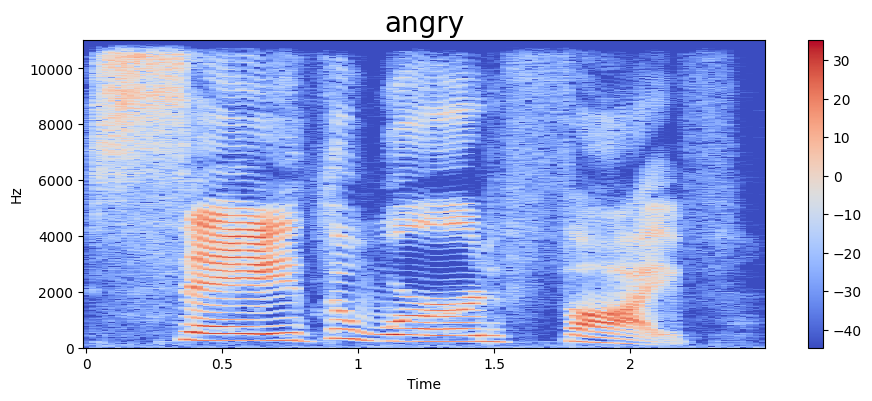

In [19]:
emo = "angry"
path = df[df["emotions"] == emo].iloc[0, 0]
data, sr = librosa.load(path, duration=3)
waveplot(data, sr, emo)
spectogram(data, sr, emo)
ipd.Audio(data, rate=sr)

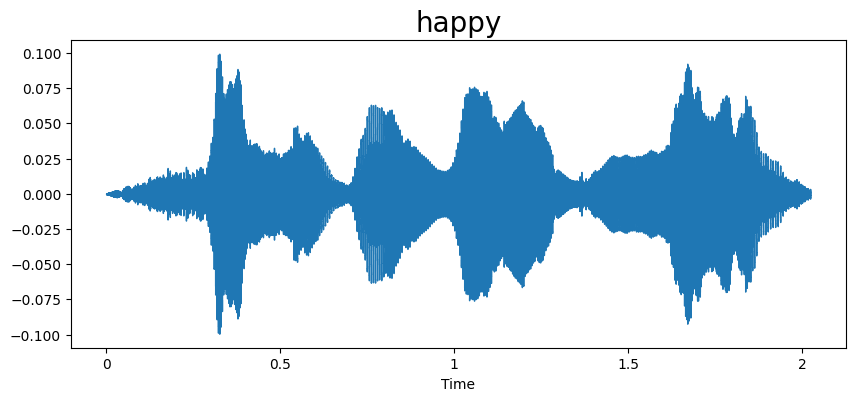

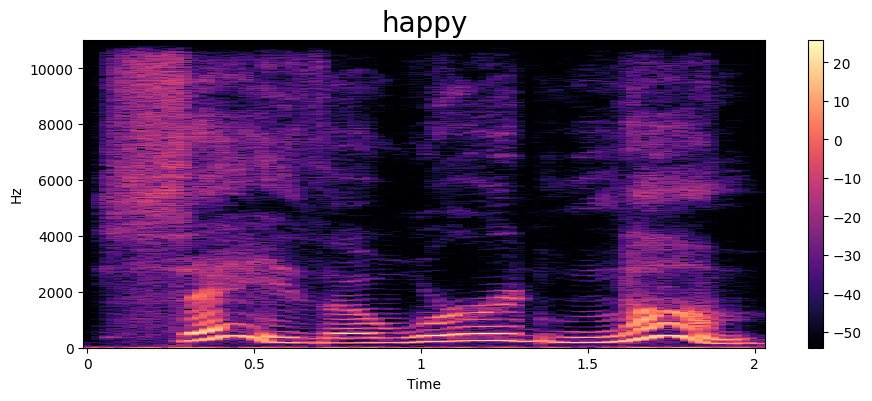

In [20]:

emo = "happy"
path = df[df["emotions"] == emo].iloc[0, 0]
data, sr = librosa.load(path, duration=3)
waveplot(data, sr, emo)
spectogram(data, sr, emo)
ipd.Audio(data, rate=sr)

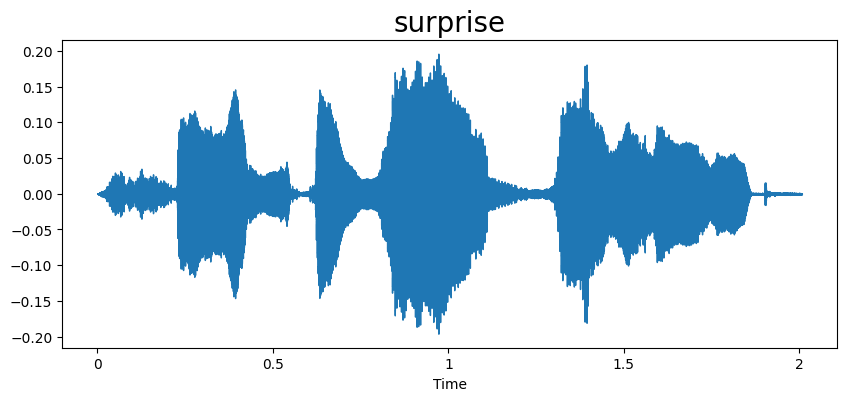

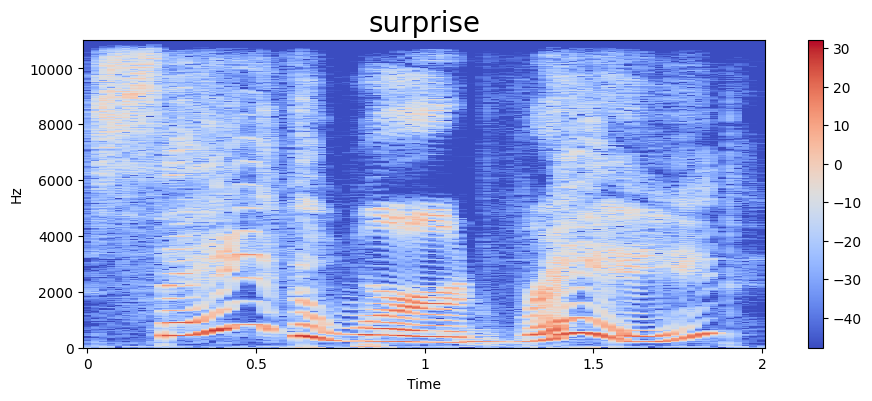

In [21]:
emo = "surprise"
path = df[df["emotions"] == emo].iloc[1, 0]
data, sr = librosa.load(path, duration=3)
waveplot(data, sr, emo)
spectogram(data, sr, emo)
ipd.Audio(data, rate=sr)

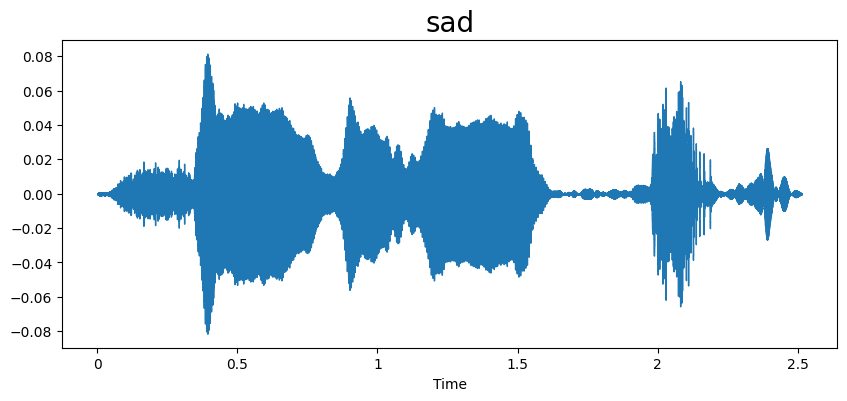

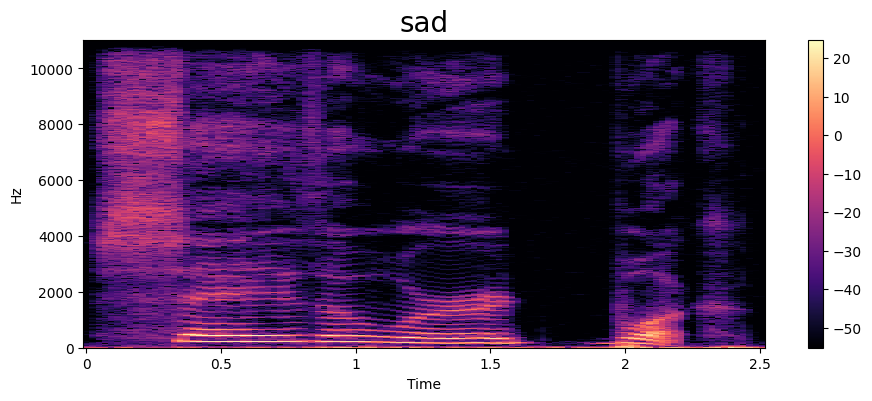

In [22]:
emo = "sad"
path = df[df["emotions"] == emo].iloc[0, 0]
data, sr = librosa.load(path, duration=3)
waveplot(data, sr, emo)
spectogram(data, sr, emo)
ipd.Audio(data, rate=sr)

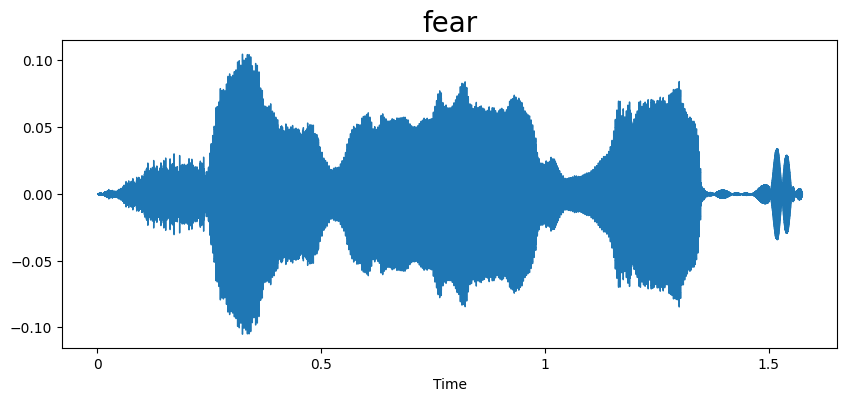

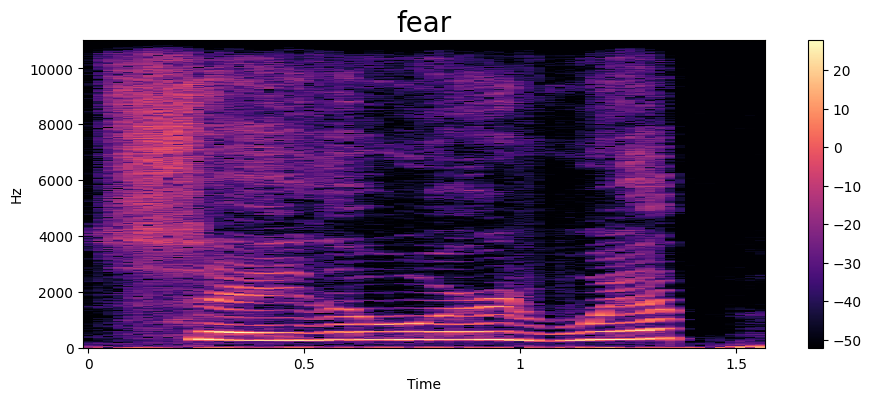

In [23]:
emo = "fear"
path = df[df["emotions"] == emo].iloc[0, 0]
data, sr = librosa.load(path, duration=3)
waveplot(data, sr, emo)
spectogram(data, sr, emo)
ipd.Audio(data, rate=sr)

In [24]:
df.shape

(2800, 2)

In [25]:
df["emotions"] = df["emotions"].apply(lambda x:label_encode_dict[x])

df.head()

,paths,emotions
0,/content/inputs/tess toronto emotional speech ...,1
1,/content/inputs/tess toronto emotional speech ...,1
2,/content/inputs/tess toronto emotional speech ...,1
3,/content/inputs/tess toronto emotional speech ...,1
4,/content/inputs/tess toronto emotional speech ...,1


---
### Feature Extraction (MFCC)
---

In [26]:
def feature_extract(data):
  mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)

  return mfcc


In [27]:
data, sr = librosa.load(path, duration=3, offset=0.5)

feature_extract(data), feature_extract(data).shape

(array([-4.8951169e+02,  9.3020454e+01,  2.0589394e+01, -1.8568945e+01,
         8.4081870e-01,  6.6872878e+00,  2.9460046e-01, -1.1101962e+00,
        -1.8977444e+01, -4.8567038e+00, -9.7150078e+00, -5.8806634e+00,
        -1.7191669e+00, -5.3875937e+00, -3.0420454e+00,  2.6313138e+00,
        -6.9454865e+00,  2.5036798e+00, -1.9029168e+00, -5.3359880e+00,
         1.5685692e-01,  1.4937348e+01,  1.0279643e+01,  2.8324099e+01,
         2.3151739e+01,  3.1853523e+01,  1.4289712e+01,  1.1189184e+01,
         3.2330410e+00,  2.5182579e+00,  1.5715454e+00,  7.2367945e+00,
         6.5365440e-01, -6.1229172e+00, -1.3363010e+00,  2.7334812e+00,
        -2.1711496e-01, -2.0278893e+00, -8.2522650e+00,  4.2979040e+00],
       dtype=float32),
 (40,))

---
### Data Augmentation
---

In [28]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape)
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


In [43]:
from tqdm import tqdm

X = []
Y = []
augmentations = ['original', 'noise', 'stretch', 'pitch']


for path, emotion in tqdm(zip(df["paths"], df["emotions"])):
    data, sr = librosa.load(path, duration=3, offset=0.5)

    for augmentation in augmentations:
        if augmentation == 'original':
            data_new = data
        elif augmentation == 'noise':
            data_new = noise(data)
        elif augmentation == 'stretch':
            data_new = stretch(data)
        elif augmentation == 'pitch':
            data_new = pitch(data, sr)

        X.append(feature_extract(data_new))
        Y.append(emotion)


X = np.array(X)
Y = np.array(Y)


2800it [05:34,  8.36it/s]


In [44]:
X.shape

(11200, 40)

In [88]:
Y.shape

(11200,)

---
### OneHot encoding Y
---

In [89]:
from sklearn.preprocessing import OneHotEncoder

encdr = OneHotEncoder()

In [90]:
Y = encdr.fit_transform(Y.reshape(-1, 1)).toarray()

In [91]:
Y.shape

(11200, 7)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=True)

In [94]:
x_train = np.expand_dims(x_train, -1)           ## for Keras model expected dimention
x_test = np.expand_dims(x_test, -1)

In [95]:
x_train.shape, x_test.shape

((8400, 40, 1, 1), (2800, 40, 1, 1))

In [96]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [74]:
X = np.expand_dims(X, -1)

In [78]:
X.shape

(11200, 40, 1)

In [59]:
# !pip install keras-tuner

In [60]:
# import kerastuner

In [101]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Conv1D, BatchNormalization, MaxPooling1D

early_stopping = EarlyStopping(monitor='val_accuracy',                                    ## early stopping...
                               patience=10,
                               restore_best_weights=True)

---
### LSTM model:
---

In [102]:
model = Sequential()

model.add(LSTM(128,return_sequences=False,input_shape=(40, 1)))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(7, activation = 'softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 40, 128)           66560     
                                                                 
 dropout_42 (Dropout)        (None, 40, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 40, 128)           131584    
                                                                 
 dropout_43 (Dropout)        (None, 40, 128)           0         
                                                                 
 lstm_44 (LSTM)              (None, 40, 128)           131584    
                                                                 
 dropout_44 (Dropout)        (None, 40, 128)           0         
                                                                 
 lstm_45 (LSTM)              (None, 40, 128)          

In [138]:
# from keras.utils import plot_model

# plot_model(model)

In [103]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [104]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), batch_size=64, callbacks=early_stopping)

Epoch 1/150
132/132 [==============================] - 18s 43ms/step - loss: 0.6906 - accuracy: 0.7282 - val_loss: 0.3025 - val_accuracy: 0.8907
Epoch 2/150
132/132 [==============================] - 3s 25ms/step - loss: 0.2123 - accuracy: 0.9289 - val_loss: 0.2531 - val_accuracy: 0.9221
Epoch 3/150
132/132 [==============================] - 3s 21ms/step - loss: 0.1774 - accuracy: 0.9369 - val_loss: 0.2146 - val_accuracy: 0.9279
Epoch 4/150
132/132 [==============================] - 3s 21ms/step - loss: 0.1432 - accuracy: 0.9538 - val_loss: 0.1125 - val_accuracy: 0.9621
Epoch 5/150
132/132 [==============================] - 3s 24ms/step - loss: 0.0999 - accuracy: 0.9664 - val_loss: 0.1271 - val_accuracy: 0.9600
Epoch 6/150
132/132 [==============================] - 3s 26ms/step - loss: 0.1065 - accuracy: 0.9657 - val_loss: 0.0890 - val_accuracy: 0.9700
Epoch 7/150
132/132 [==============================] - 3s 21ms/step - loss: 0.0895 - accuracy: 0.9705 - val_loss: 0.0917 - val_accuracy

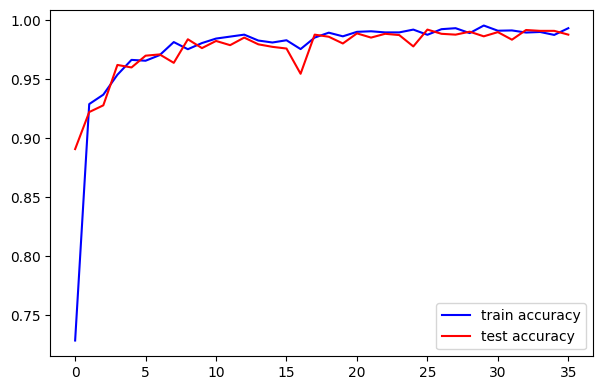

In [107]:
plt.figure(figsize=(7, 4.5))
plt.plot(history.history["accuracy"], color="blue", label="train accuracy")
plt.plot(history.history["val_accuracy"], color="red", label="test accuracy")
plt.legend()
plt.show()

In [127]:
test_df = df.sample(8).reset_index(drop=True)

test_df.head(8)

,paths,emotions
0,/content/inputs/tess toronto emotional speech ...,2
1,/content/inputs/tess toronto emotional speech ...,4
2,/content/inputs/tess toronto emotional speech ...,3
3,/content/inputs/tess toronto emotional speech ...,3
4,/content/inputs/tess toronto emotional speech ...,5
5,/content/inputs/tess toronto emotional speech ...,2
6,/content/inputs/tess toronto emotional speech ...,1
7,/content/inputs/tess toronto emotional speech ...,1


In [128]:
def predict_single_audio(path):
  data, sr = librosa.load(path, duration=3, offset=0.5)
  x = feature_extract(data).reshape((1, 40, 1))

  return np.argmax(model.predict(x))

In [129]:
print("predicted emotion:", predict_single_audio(test_df["paths"][0]))

1/1 [==============================] - 0s 48ms/step
predicted emotion: 2


In [130]:
test_df.iloc[0:1]

,paths,emotions
0,/content/inputs/tess toronto emotional speech ...,2


In [131]:
print("predicted emotion:", predict_single_audio(test_df["paths"][7]))

1/1 [==============================] - 0s 30ms/step
predicted emotion: 1


In [132]:
test_df.iloc[7:8]

,paths,emotions
7,/content/inputs/tess toronto emotional speech ...,1


In [133]:
print("predicted emotion:", predict_single_audio(test_df["paths"][4]))

1/1 [==============================] - 0s 62ms/step
predicted emotion: 5


In [134]:
test_df.iloc[4:5]

,paths,emotions
4,/content/inputs/tess toronto emotional speech ...,5


In [ ]:
label_encode_dict

{'happy': 0,
 'sad': 1,
 'neutral': 2,
 'surprise': 3,
 'fear': 4,
 'angry': 5,
 'disgust': 6}

In [135]:
print("predicted emotion:", predict_single_audio("/content/20230702_235112.wav"))

1/1 [==============================] - 0s 36ms/step
predicted emotion: 1


In [136]:
print("predicted emotion:", predict_single_audio("/content/03-01-01-01-01-01-01.wav"))

1/1 [==============================] - 0s 95ms/step
predicted emotion: 6
